In [1]:
from sympy import init_printing, symbols, integrate, Basic, latex, sqrt, Add, eye, factor, simplify
init_printing()

### Cuadrimomentos.

Un cuadrimomento cumple las siguientes propiedades:

Sean $p = (p^0,p^1,p^2,p^3)$ y $k = (k^0,k^1,k^2,k^3)$ dos cuadrimomentos, estos cumplen las siguientes propiedades:
 1. $p \pm k = (p^0 \pm k^0, p^1 \pm k^1, p^2 \pm k^2, p^3 \pm k^3)$  
 2. $ p_\mu k^\mu = p^0 k^0 - \vec{p}.\vec{k}$
 3. $|p| = \sqrt{p_\mu p^\mu}$
 4. $p = k$ si y solo si $p^\mu = k^\mu$ con $i=0,1,2,3$
 5. se puede construir una matriz con componentes $ L^{\mu \nu} = p^\mu k^\nu$.

In [2]:
from kinematics import FV, SpinorU, SpinorV

In [3]:
p0,p1,p2,p3 = symbols(r'{{p^{0:4}}}',positive=True) 
k0,k1,k2,k3 = symbols(r'{{k^{0:4}}}',positive=True)
p = FV(p0,p1,p2,p3)
k = FV(k0,k1,k2,k3)
p,k

In [4]:
p+k

In [5]:
p*k

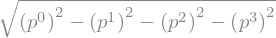

In [6]:
abs(p)

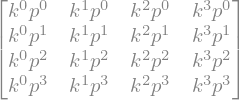

In [7]:
p@k

### Espinores de Dirac

Sabemos que los espinores de Dirac $u(p,s)$ y $v(p,s)$, son de la forma:

\begin{equation*}
u(p,s) =  \begin{pmatrix}
\phi^s \\
\frac{\sigma \cdot \vec{p}}{p^0 + m} \phi^s 
\end{pmatrix}; \qquad
v(p,s) =  \begin{pmatrix}
\frac{\sigma \cdot \vec{p}}{p^0 + m} \phi^s\\
\phi^s  
\end{pmatrix} \qquad
\end{equation*}

donde $s = 1,2$. Una de las propiedades que ellos cumplen es siguiente:
$$\sum_{s} u \overline{u} = \gamma_\mu p^\mu + m; \qquad \sum_{s} v \overline{v} = \gamma_\mu p^\mu - m$$

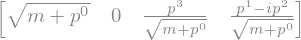

In [8]:
m = symbols('m',positive=True)
u = lambda s:SpinorU(p,m,s)
u(1).adj()

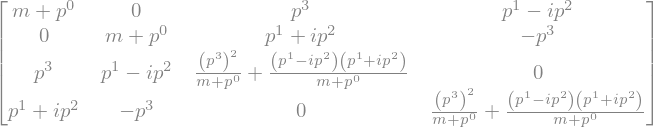

In [9]:
r1 = Add(*[u(s).matrixform()*u(s).adj() for s in [1,2]])
r1 

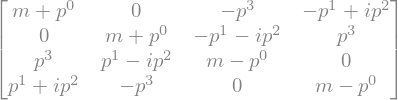

In [10]:
r2 = p.slash() + m*eye(4)
r2

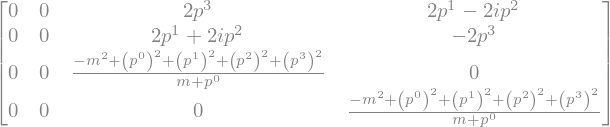

In [11]:
(r1-r2).simplify().subs({p*p:m**2})

### Proceso $e^+ e^- \rightarrow \gamma \rightarrow \mu^+ \mu^-$

In [12]:
from sympy import sin, cos, conjugate, I
from sympy.physics.matrices import mgamma, msigma

g = [[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,-1]]

E, θ = symbols(r'E, theta',positive=True)
pp = symbols(r'p',positive=True)

pmu1 = FV(E,0,0,E)
pmu2 = FV(E,0,0,-E)
pmu3 = FV(E,E*sin(θ),0,E*cos(θ))
pmu4 = FV(E,-E*sin(θ),0,-E*cos(θ))

display(pmu3)
display(pmu4)

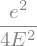

In [13]:
s = (pmu1+pmu2)*(pmu1+pmu2)
e, me, mmu = symbols(r'e, m_e, m_\mu',positive=True)
A = e**2/(s)
A

In [14]:
u3 = lambda s3:SpinorU(pmu3,mmu,s3)
v4 = lambda s4:SpinorV(pmu4,mmu,s4)
v2 = lambda s2:SpinorV(pmu2,me,s2)
u1 = lambda s1:SpinorU(pmu1,me,s1)

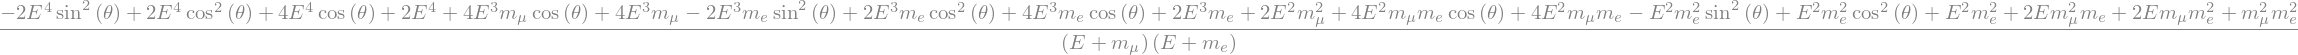

In [15]:

M = lambda s1,s2,s3,s4:Add(*[(
    (u3(s3).adj()*g[μ][ν]*mgamma(ν)*v4(s4).matrixform())*(v2(s2).adj()*mgamma(μ)*u1(s1).matrixform()))[0] 
                             for μ in range(4) for ν in range(4)])
M(1,1,1,1).factor()

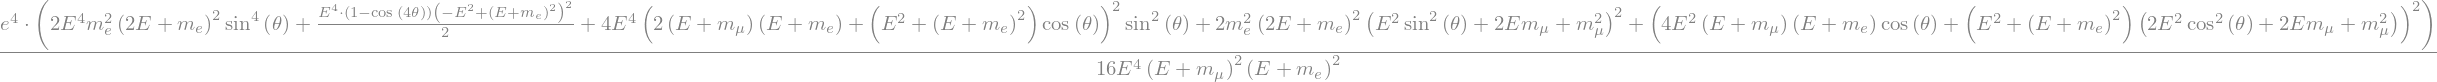

In [16]:
spins = [1,2]
r = Add(*[M(s1,s2,s3,s4)*conjugate(M(s1,s2,s3,s4)) for s1 in spins for s2 in spins for s3 in spins for s4 in spins])
t = A**2*(r/4).simplify()#.collect(pp3)
t

In [17]:
t = t.subs({me:0,mmu:0}).simplify().subs({sin(θ):sqrt(1-cos(θ)**2)})
t

## W decay into leptons

### kinematics

In [18]:
mW = symbols('m_W', positive=True)
pmu1 = FV(mW, 0, 0, 0)
pmu3 = FV(E, E*sin(θ), 0, E*cos(θ))
pmu4 = FV(E, -E*sin(θ), 0, -E*cos(θ))

### Massive vector polarizations along the z axis

In [19]:
m, E, pz = symbols('m, E, p_z', positive=True)
eps_minus = FV(0, 1/sqrt(2), -I/sqrt(2), 0)
eps_L = FV(0, 0, 0, 1) # W boson at rest
eps_plus = FV(0, -1/sqrt(2), -I/sqrt(2), 0)

In [20]:
def polarization(type):
    if type == 1:
        out = eps_plus
    elif type == -1:
        out = eps_minus
    elif type == 0:
        out = eps_L
    else:
        raise ValueError("type must be 1, -1 or 0")
    return out

In [21]:
ml, mnu = symbols(r'm_\ell, m_\nu', positive=True)
u3 = lambda s3:SpinorU(pmu3, ml, s3)
v4 = lambda s4:SpinorV(pmu4, mnu, s4)
I4x4 = eye(4)
fV, fA = symbols(r'f_V, f_A', real=True)  # vector and axial couplings


In [22]:
from sympy import Dummy, Abs
from sympy.physics.quantum.dagger import Dagger
positive_nu = Dummy(positive=True)
positive_l = Dummy(positive=True)

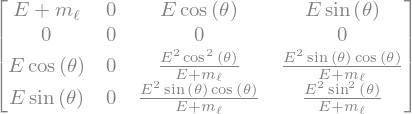

In [23]:
u3(1).matrixform()*u3(1).adj()

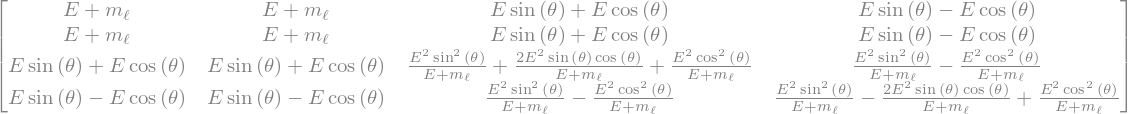

In [24]:
Add(*[(u3(s3).matrixform()*u3(s4).adj()) for s3 in spins for s4 in spins]).applyfunc(
    lambda x:x.collect([cos(θ), sin(θ)], simplify)
    )

In [28]:
from sympy import Matrix

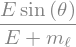

In [33]:
sp1 = (
    pmu3.p1*msigma(1) + 
    pmu3.p2*msigma(2)+ 
    pmu3.p3*msigma(3)
    )/(pmu3.p0 + ml)
(sp1*Matrix(
    [
        [1],
        [0]
    ]
))#[1]

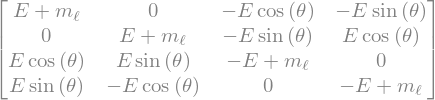

In [122]:
pmu3.slash() + ml*I4x4

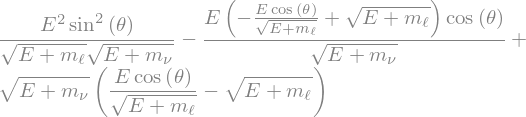

In [83]:
Jmu = lambda nu, s3, s4: (
    (u3(s3).adj()*mgamma(nu)*(I4x4 - mgamma(5))*v4(s4).matrixform())
    )[0]
Jmu(0,1,1)

In [55]:
(
    mgamma(0)*mgamma(0) -
    mgamma(1)*mgamma(1) - 
    mgamma(2)*mgamma(2) - 
    mgamma(3)*mgamma(3)
) == 4*I4x4

True

In [103]:
(Jmu(1, 1, 1) + Jmu(1, 1, 2) + Jmu(1, 2, 1) + Jmu(1, 2, 2)).subs(ml,0).subs(mnu,0).simplify()

In [85]:
def spin_sum(J, mu):
    return Add(*[J(mu, s3, s4) for s3 in spins for s4 in spins])

In [87]:
def Jmu_average(pol_type, J):
    eps = polarization(pol_type).matrixform()
    J0 = eps[0]*spin_sum(J, 0)
    J1 = eps[1]*spin_sum(J, 1)
    J2 = eps[2]*spin_sum(J, 2)
    J3 = eps[3]*spin_sum(J, 3)
    return J0 - J1 - J2 - J3

In [93]:
M_plus = Jmu_average(1,Jmu).subs(
    E + mnu, positive_nu
    ).subs(
        E + ml, positive_l
        ).subs({
            positive_l:E + ml,
            positive_nu: E + mnu
            }).subs(mnu, 0).subs(ml, 0).simplify()

M_minus = Jmu_average(-1, Jmu).subs(
    E + mnu, positive_nu
    ).subs(
        E + ml, positive_l
        ).subs({
            positive_l:E + ml,
            positive_nu: E + mnu
            }).subs(mnu, 0).subs(ml, 0).simplify()

M_0 = Jmu_average(0, Jmu).subs(
    E + mnu, positive_nu
    ).subs(
        E + ml, positive_l
        ).subs({
            positive_l:E + ml,
            positive_nu: E + mnu
            }).subs(mnu, 0).subs(ml, 0)#.simplify()

In [94]:
def M_square(M):
    return M*conjugate(M)

In [95]:
M_square(M_plus).simplify()

In [96]:
M_square(M_minus).simplify()


In [92]:
M_square(M_0).simplify()